In [ ]:
##Steps to be completed
#Importing DataBase
#Unzip the folder and get ready with train and test Data
#Study the dataset and make the data ready for the Model(Data Preprocessing)
#Image Scalling
#Importing the VGG16 Model, and make it ready to fit the data
#Fit the model in our Dataset and analyse its performance
#Get the accuracy and compare the training accuracy and Validation accuracy
#fit the model in test data and see the performance
#Get a new image and predict the disease
#Save the model
#Make a UI and make ready for the user(Needed Flask)


In [ ]:
!ls

sample_data  test.zip  train.zip


## UnZip the train and test data


In [ ]:
from zipfile import ZipFile

with ZipFile('train.zip','r') as zip:
  zip.extractall()
print("Train Dataset extracted")

Train Dataset extracted


In [ ]:
from zipfile import ZipFile

with ZipFile('test.zip','r') as zip:
  zip.extractall()
print("Test Dataset extracted")

Test Dataset extracted


In [ ]:
#Counting number of images on train data and watching the number of classes
import os
file_count_train = 0
for path, dir, files in os.walk('/content/train'):
  file_count_train+=len(files)
  print(path)
print("Number of images in train:",file_count_train)

/content/train
/content/train/clubbing
/content/train/half and half nailes (Lindsay_s nails)
/content/train/Darier_s disease
/content/train/koilonychia
/content/train/pale nail
/content/train/beau_s lines
/content/train/eczema
/content/train/onycholycis
/content/train/white nail
/content/train/red lunula
/content/train/healthy
/content/train/Muehrck-e_s lines
/content/train/leukonychia
/content/train/aloperia areata
/content/train/terry_s nail
/content/train/psoriosis
/content/train/bluish nail
/content/train/splinter hemmorrage
/content/train/yellow nails
Number of images in train: 724


In [ ]:
#Counting number of images on test data and watching the number of classes
import os
file_count_test =0
for path, dir, files in os.walk('/content/test'):
  file_count_test+=len(files)
  print(path)
print("Number of images in test:",file_count_test)

/content/test
/content/test/clubbing
/content/test/half and half nailes (Lindsay_s nails)
/content/test/Darier_s disease
/content/test/koilonychia
/content/test/pale nail
/content/test/beau_s lines
/content/test/eczema
/content/test/onycholycis
/content/test/white nail
/content/test/red lunula
/content/test/healthy
/content/test/Muehrck-e_s lines
/content/test/leukonychia
/content/test/aloperia areata
/content/test/terry_s nail
/content/test/psoriosis
/content/test/bluish nail
/content/test/splinter hemmorrage
/content/test/yellow nails
Number of images in test: 210


## There are 655 images in train and 183 in test Data


## Checking the dimensions of the image


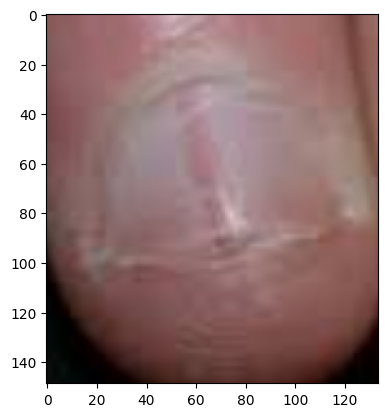

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/train/Darier_s disease/1.PNG')
imgplot = plt.imshow(img)
imgplot

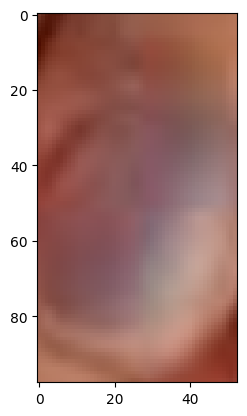

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test/bluish nail/12.PNG')
imgplot = plt.imshow(img)
imgplot

## We have to resize the image to 150*150


In [ ]:
import os
os.makedirs("train.resize", exist_ok=True)
print("Train resized folder made")

Train resized folder made


In [ ]:
import os
os.makedirs("test.resize", exist_ok=True)
print("Train resized folder made")

Train resized folder made


In [ ]:
from PIL import Image
import os

original_folder = '/content/train'
resized_folder = '/content/train.resize'

for path, dir, files in os.walk(original_folder):
  for folder in dir:
    # Create the corresponding folder in resized_folder
    os.makedirs(resized_folder + '/' + folder, exist_ok=True)

    ImageFiles = os.listdir(original_folder + '/' + folder)

    for image in ImageFiles:
      image_path = original_folder + '/' + folder + '/' + image

      try:
        img = Image.open(image_path)
        img = img.resize((150, 150))
        img = img.convert("RGB")

        # Save to the correct file path
        save_path = resized_folder + '/' + folder + '/' + image
        img.save(save_path)

      except Exception as e:
        print(f"Skipped {image_path}: {e}")
print('Training Data resized Completed')


Training Data resized Completed


In [ ]:
from PIL import Image
import os

original_folder = '/content/test'
resized_folder = '/content/test.resize'

for path, dir, files in os.walk(original_folder):
  for folder in dir:
    # Create the corresponding folder in resized_folder
    os.makedirs(resized_folder + '/' + folder, exist_ok=True)

    ImageFiles = os.listdir(original_folder + '/' + folder)

    for image in ImageFiles:
      image_path = original_folder + '/' + folder + '/' + image

      try:
        img = Image.open(image_path)
        img = img.resize((150, 150))
        img = img.convert("RGB")

        # Save to the correct file path
        save_path = resized_folder + '/' + folder + '/' + image
        img.save(save_path)

      except Exception as e:
        print(f"Skipped {image_path}: {e}")
print("Test Data resized completed")

Test Data resized completed


## Checking dimensions in train.resize


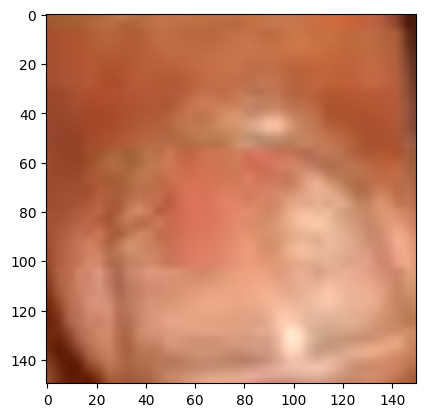

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/train.resize/aloperia areata/10.PNG')
imgplot = plt.imshow(img)
imgplot

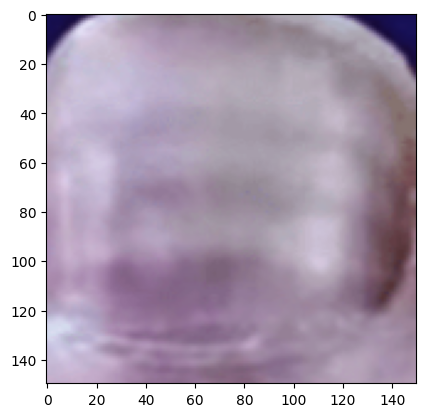

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test.resize/Muehrck-e_s lines/1.PNG')
imgplot = plt.imshow(img)
imgplot

In [ ]:
#Counting number of images on train_resized data
import os
file_count_train_reseized = 0
for path, dir, files in os.walk('/content/train.resize'):
  file_count_train_reseized+=len(files)
  # print(path)
print("Number of images in train resized:",file_count_train_reseized)

Number of images in train resized: 724


In [ ]:
#Counting number of images on test_resized data
import os
file_count_test_reseized = 0
for path, dir, files in os.walk('/content/test.resize'):
  file_count_test_reseized+=len(files)
  # print(path)
print("Number of images in train resized:",file_count_test_reseized)

Number of images in train resized: 210


## All the images of test and train are resized

## Pre processing the data and creating labels

In [ ]:
# from PIL import Image
# import numpy as np
# import os
# from sklearn.utils import shuffle
# from tensorflow.keras.applications.vgg16 import preprocess_input

# ResizedFolderPath = '/content/train.resize'
# Train_subfolders = sorted(os.listdir(ResizedFolderPath))

# Labels_map = {folder: idx for idx, folder in enumerate(Train_subfolders)}
# print("Label map:", Labels_map)

# X_train = []
# y_train = []

# for folder in Train_subfolders:
#     folderPath = os.path.join(ResizedFolderPath, folder)
#     for image_name in os.listdir(folderPath):
#         image_path = os.path.join(folderPath, image_name)
#         if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#             try:
#                 img = Image.open(image_path).resize((224, 224)).convert('RGB')
#                 img_array = np.array(img)
#                 img_array = preprocess_input(img_array)
#                 X_train.append(img_array)
#                 y_train.append(Labels_map[folder])
#             except Exception as e:
#                 print(f"Skipped {image_path}: {e}")

# X_train = np.array(X_train)
# y_train = np.array(y_train)


# X_train, y_train = shuffle(X_train, y_train, random_state=42)

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)


In [ ]:
# from PIL import Image
# import numpy as np
# import os
# from sklearn.utils import shuffle
# from tensorflow.keras.applications.vgg16 import preprocess_input

# ResizedFolderPath = '/content/test.resize'
# Test_subfolders = sorted(os.listdir(ResizedFolderPath))

# Labels_map = {folder: idx for idx, folder in enumerate(Test_subfolders)}
# print("Label map:", Labels_map)

# X_test = []
# y_test = []

# for folder in Test_subfolders:
#     folderPath = os.path.join(ResizedFolderPath, folder)
#     for image_name in os.listdir(folderPath):
#         image_path = os.path.join(folderPath, image_name)
#         if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#             try:
#                 img = Image.open(image_path).resize((224, 224)).convert('RGB')
#                 img_array = np.array(img)
#                 img_array = preprocess_input(img_array)
#                 X_test.append(img_array)
#                 y_test.append(Labels_map[folder])
#             except Exception as e:
#                 print(f"Skipped {image_path}: {e}")

# X_test = np.array(X_test)
# y_test = np.array(y_test)

# # Shuffle data
# X_test, y_test = shuffle(X_test, y_test, random_state=42)

# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

#Importing the VGG16 Model, and make it ready to fit the data

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

adam = Adam(learning_rate = 0.0001)
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in model.layers:
    layer.trainable = False

x = Flatten()(model.output)
x = Dropout(0.5)(x)
x= Dense(256, activation='relu')(x)
predictions = Dense(19, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │         4,883 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,816,979 (64.15 MB)

 Trainable params: 2,102,291 (8.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'], run_eagerly=True)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_set = train_datagen.flow_from_directory('/content/train.resize',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/test.resize',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')
train_set.class_indices

Found 724 images belonging to 19 classes.
Found 210 images belonging to 19 classes.


{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'healthy': 8,
 'koilonychia': 9,
 'leukonychia': 10,
 'onycholycis': 11,
 'pale nail': 12,
 'psoriosis': 13,
 'red lunula': 14,
 'splinter hemmorrage': 15,
 'terry_s nail': 16,
 'white nail': 17,
 'yellow nails': 18}

#Fit the model in our Dataset and analyse its performance

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.utils import class_weight

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode= 'max',
    patience=3,
    restore_best_weights=True
)

history =model.fit(train_set,validation_data=test_set, epochs=50, steps_per_epoch = len(train_set)//3, validation_steps = len(test_set)//3)
# Get final epoch's training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Print formatted values without scientific notation
print("Training Accuracy: {:.4f}".format(train_acc))
print("Validation Accuracy: {:.4f}".format(val_acc))


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 205s 29s/step - accuracy: 0.6602 - loss: 1.0359 - val_accuracy: 0.7344 - val_loss: 0.8348
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 201s 29s/step - accuracy: 0.6702 - loss: 0.9534 - val_accuracy: 0.7500 - val_loss: 0.7481
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 191s 27s/step - accuracy: 0.7121 - loss: 0.9331 - val_accuracy: 0.7344 - val_loss: 0.8642
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.7545 - loss: 0.8093 - val_accuracy: 0.8125 - val_loss: 0.7349
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 207s 30s/step - accuracy: 0.7431 - loss: 0.8845 - val_accuracy: 0.8594 - val_loss: 0.5627
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 199s 31s/step - accuracy: 0.7610 - loss: 0.8491 - val_accuracy: 0.7656 - val_loss: 0.7465
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 202s 29s/step - accuracy: 0.6807 - loss: 1.0051 - val_accuracy: 0.8750 - val_loss: 0.5633
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.7500 - loss: 0.7437 - val_accuracy: 0.8281 - val_loss: 0.6

In [ ]:
# score, acc = model.evaluate(X_test, y_test)
# print('Test Loss = ',score)
# print('Test Accuracy = ',acc)

In [ ]:
ResizedFolderPath = '/content/train.resize'
Train_subfolders = sorted(os.listdir(ResizedFolderPath))

Labels_map = {folder: idx for idx, folder in enumerate(Train_subfolders)}
img_path = input("Enter the path of the image:")
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = preprocess_input(x)
preds = model.predict(np.array([x]))
cond= False
predicted_label = labels[np.argmax(preds)]
for key,value in Labels_map.items():
  if value== int(predicted_label):
    print("The Disease is:",key)
    cond=True
if(cond==False):
  print("Congratulations!No Disease Detected")

Enter the path of the image:/content/train.resize/psoriosis/1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
The Disease is: psoriosis


In [ ]:
model.save("DiseaseDetection.h5")
print("Model Saved successfully")

Model Saved successfully


## Building UI and forming a Flask App

In [ ]:
!pip install flask pyngrok --quiet

In [ ]:
from flask import Flask, request
from werkzeug.utils import secure_filename

import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input


UPLOAD_FOLDER = '/tmp/uploads'
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

try:
    model = load_model("/content/DiseaseDetection.h5")
except Exception as e:
    print(f"Error loading model: {e}")
Labels_map = {'Darier_s disease': 0, 'Muehrck-e_s lines': 1, 'aloperia areata': 2, 'beau_s lines': 3, 'bluish nail': 4, 'clubbing': 5, 'eczema': 6, 'half and half nailes (Lindsay_s nails)': 7, 'koilonychia': 8, 'leukonychia': 9, 'onycholycis': 10, 'pale nail': 11, 'red lunula': 12, 'splinter hemmorrage': 13, 'terry_s nail': 14, 'white nail': 15, 'yellow nails': 16}
reverse_labels_map = {v: k for k, v in Labels_map.items()}
num_classes = len(reverse_labels_map)


app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route('/')
def index():
    return '''
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Disease Detection Upload</title>
  <style>
    body {
      background: linear-gradient(to right, #2c3e50, #3498db);
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      color: #fff;
      text-align: center;
      padding: 50px;
    }
    .container {
      background-color: rgba(255, 255, 255, 0.1);
      border-radius: 15px;
      padding: 40px;
      max-width: 500px;
      margin: auto;
      box-shadow: 0 8px 30px rgba(0, 0, 0, 0.3);
    }
    h1 {
      font-size: 2.5em;
      margin-bottom: 20px;
      color: #f1c40f;
    }
    input[type="file"] {
      display: block;
      margin: 20px auto;
      padding: 10px;
      font-size: 1.1em;
      border-radius: 10px;
      background-color: #fff;
      color: #000;
      cursor: pointer;
      border: none;
    }
    input[type="submit"] {
      background-color: #27ae60;
      color: white;
      padding: 12px 25px;
      font-size: 1.1em;
      border: none;
      border-radius: 10px;
      cursor: pointer;
      transition: 0.3s;
    }
    input[type="submit"]:hover {
      background-color: #2ecc71;
      transform: scale(1.05);
    }
  </style>
</head>
<body>
  <div class="container">
    <h1>🌿 Upload an Image to Detect Disease 🌿</h1>
    <form method="POST" enctype="multipart/form-data">
      <input type="file" name="file" required>
      <input type="submit" value="Upload & Predict">
    </form>
  </div>
</body>
</html>
'''


@app.route('/', methods=['POST'])
def upload_and_predict():
    file = request.files['file']
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)

        try:
            img = Image.open(filepath).resize((224, 224)).convert('RGB')
            x = np.array(img)
            x = preprocess_input(x)
            x = np.expand_dims(x, axis=0)

            # Ensure the model was loaded successfully before predicting
            if 'model' in globals() and model is not None:
                preds = model.predict(x)
                print(preds)
                predicted_class_index = np.argmax(preds[0])
                predicted_label = reverse_labels_map.get(predicted_class_index, "Unknown")
                message = f"The Detected Condition is: {predicted_label}"
            else:
                message = "Error: Model not loaded."

        except Exception as e:
            message = f"Error during prediction: {str(e)}"
        finally:
            # Ensure filepath exists before trying to remove it
            if os.path.exists(filepath):
                os.remove(filepath)

            return f'''
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Prediction Result</title>
  <style>
    body {{
      margin: 0;
      padding: 0;
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      background: linear-gradient(135deg, #1abc9c, #2c3e50);
      color: #fff;
      text-align: center;
      height: 100vh;
      display: flex;
      justify-content: center;
      align-items: center;
    }}
    .result-box {{
      background: rgba(255, 255, 255, 0.1);
      border-radius: 15px;
      padding: 50px;
      box-shadow: 0 10px 40px rgba(0, 0, 0, 0.4);
      max-width: 600px;
    }}
    h1 {{
      font-size: 2.8em;
      margin-bottom: 20px;
      color: #f1c40f;
      text-shadow: 2px 2px 10px rgba(0,0,0,0.5);
    }}
    p {{
      font-size: 1.5em;
      margin-bottom: 30px;
    }}
    a {{
      display: inline-block;
      padding: 12px 25px;
      font-size: 1.2em;
      background-color: #e74c3c;
      color: white;
      text-decoration: none;
      border-radius: 10px;
      transition: background-color 0.3s, transform 0.2s;
    }}
    a:hover {{
      background-color: #c0392b;
      transform: scale(1.05);
    }}
  </style>
</head>
<body>
  <div class="result-box">
    <h1>🌟 Prediction Result 🌟</h1>
    <p>{message}</p>
    <a href="/">🔁 Upload Another Image</a>
  </div>
</body>
</html>
'''

    return 'Invalid file or file type'

# Step 5: Launch app using pyngrok
# Replace this string with your actual token
# authtoken = "YOUR_NGROK_AUTH_TOKEN" # <-- Replace with your token
# conf.get_default().auth_token = authtoken

# It seems you've already set the token in a previous cell,
# so you might not need this line again if you run the cells sequentially.

# Ensure you've set your ngrok auth token before this step.
# You can do this by running !ngrok config add-authtoken YOUR_NGROK_AUTH_TOKEN
# or programmatically as you did in the previous cell.


In [ ]:
# from pyngrok import ngrok
# ngrok.kill()
# from pyngrok import conf, ngrok

# # Replace this string with your actual token
# authtoken = "2yjEDO1RftnMZzEjXERIzKMLeQD_PiAVV7jJGG5hHACyKrSD"

# # Set authtoken
# conf.get_default().auth_token = authtoken
# # Start a new ngrok tunnel
# try:
#     public_url = ngrok.connect(5000)
#     print(f"Your app is live at: {public_url}")
#     app.run(port=5000, use_reloader=False) # use_reloader=False to avoid running the app twice
# except Exception as e:
#     print(f"Error starting ngrok or Flask app: {e}")